In [117]:
import torch
from torch import nn, optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
print(torch.cuda.device_count()) # Count number of devices

cuda
1


In [137]:
class LinearRegression(nn.Module):
    '''
        Class to define the neural network using Linear layers. Importing nn.Module is necessary whenever building any NN
    '''

    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.layer1 = nn.Linear(in_features=1, out_features=1, bias=True, dtype=torch.float32)
        self.layer2 = nn.Linear(in_features=1, out_features=1, bias=True, dtype=torch.float32)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        self.forward1 = self.layer1(x)
        return self.layer2(self.forward1)

In [326]:
torch.manual_seed(42)
# import random
# random.seed(42)
# np.random.seed(42)
# torch.cuda.manual_seed(42)
# torch.backends.cudnn.deterministic = False

In [327]:
model_linear = LinearRegression()
model_linear.to(device=device)
model_linear.state_dict()

OrderedDict([('layer1.weight', tensor([[0.7645]], device='cuda:0')),
             ('layer1.bias', tensor([0.8300], device='cuda:0')),
             ('layer2.weight', tensor([[-0.2343]], device='cuda:0')),
             ('layer2.bias', tensor([0.9186], device='cuda:0'))])

In [244]:
np.random.normal(1,0.2,(2,3))

array([[1.31584256, 1.15348695, 0.90610512],
       [1.10851201, 0.90731646, 0.90685405]])

In [199]:
# Create training data
X = torch.arange(0,100,1, dtype=torch.float32).unsqueeze(dim=1)
y = torch.arange(0,100,1) + np.random.normal(10,5,100)
y = y.unsqueeze(dim=1)

In [158]:
# before unsqueezing
# X.dtype, y.dtype, X.shape, y.shape

(torch.float32, torch.float64, torch.Size([100]), torch.Size([100]))

In [200]:
# after unsqueezing
X.dtype, y.dtype, X.shape, y.shape

(torch.float32, torch.float64, torch.Size([100, 1]), torch.Size([100, 1]))

In [201]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [202]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

(torch.Size([80, 1]),
 torch.Size([80, 1]),
 torch.Size([20, 1]),
 torch.Size([20, 1]))

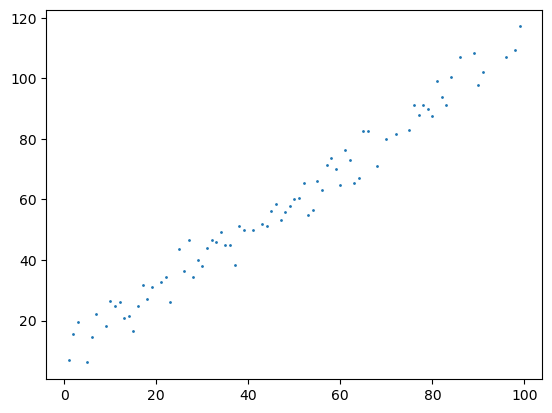

In [203]:
plt.scatter(x_train,y_train, s=1)

## Training Linear Model

In [292]:
model_linear = LinearRegression()
model_linear.to(device=device)
model_linear.state_dict()

OrderedDict([('layer1.weight', tensor([[0.7645]], device='cuda:0')),
             ('layer1.bias', tensor([0.8300], device='cuda:0')),
             ('layer2.weight', tensor([[-0.2343]], device='cuda:0')),
             ('layer2.bias', tensor([0.9186], device='cuda:0'))])

In [234]:
for params in model_linear.parameters():
    print(params)

Parameter containing:
tensor([[0.2861]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.2184], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.3893]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.8207], device='cuda:0', requires_grad=True)


In [235]:
loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_linear.parameters(), lr=0.005)

In [236]:
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

In [237]:
x_train.size()

torch.Size([80, 1])

In [238]:
epochs = 600

for epoch in np.arange(epochs):
    model_linear.train() # set into training mode

    y_pred = model_linear(x_train) # forward pass

    loss_epoch = loss_function(y_pred, y_train) # calculate loss function 
    
    # print("Loss epoch data type: ", loss_epoch.dtype)

    optimizer.zero_grad() # set optimizer gradient to 0 because fresh gradient for every epoch

    loss_epoch.backward() # Computes the gradient of the loss with respect for every model parameter to be updated

    optimizer.step() # Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them

    ### Testing
    model_linear.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_linear(x_test)
    
        # 2. Calculate the loss
        test_loss = loss_function(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss_epoch} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 53.052905476992784 | Test loss: 61.30796436036007
Epoch: 100 | Train loss: 12.518410455335404 | Test loss: 13.720482341591277
Epoch: 200 | Train loss: 12.05654614408734 | Test loss: 14.110365362111487
Epoch: 300 | Train loss: 12.053414365549113 | Test loss: 14.013183305803693
Epoch: 400 | Train loss: 11.735235293109442 | Test loss: 14.251238921675839
Epoch: 500 | Train loss: 11.534222431380776 | Test loss: 14.365111475083985


In [239]:
model_linear.state_dict()

OrderedDict([('layer1.weight', tensor([[1.1729]], device='cuda:0')),
             ('layer1.bias', tensor([0.4440], device='cuda:0')),
             ('layer2.weight', tensor([[1.1884]], device='cuda:0')),
             ('layer2.bias', tensor([0.0285], device='cuda:0'))])

In [240]:
# Turn model into evaluation mode
model_linear.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_linear(x_test)
y_preds

tensor([[132.9773],
        [103.7052],
        [ 93.9479],
        [123.2199],
        [ 11.7073],
        [131.5834],
        [130.1895],
        [ 34.0099],
        [ 56.3124],
        [  0.5561],
        [135.7651],
        [102.3113],
        [119.0382],
        [ 99.5235],
        [ 28.4342],
        [128.7955],
        [ 59.1002],
        [121.8260],
        [ 96.7357],
        [  6.1317]], device='cuda:0')

### Below plot shows model predicting straight line (green) because we have used Linear() layer

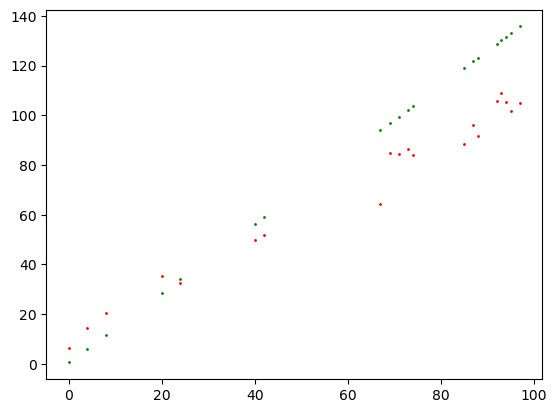

In [241]:
plt.scatter(x_test.cpu(), y_preds.cpu(), s=1, c="green")
plt.scatter(x_test.cpu(), y_test.cpu(), s=1, c="red")

In [332]:
torch.eq(torch.ones(2),torch.ones(2)).sum().item()

2